In [77]:
import scipy as sp
from scipy.special import erf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from matplotlib.colors import LogNorm
import ROOT as rt

Welcome to JupyROOT 6.18/02


In [64]:
xsec = {'5.99E-3': [0.0102, 0.000825, 0.0641, 0.1325, 2.494387627837366e-08, 0.0186, 0.0001923076923076923, 0.0611, 0.00125, 0.0005], 
        '2.15E-3': [0.00010869565217391305, 0.0018, 0.00062, 0.0055, 0.0025, 1.0038610038610038e-05, 0.0172, 1.2355441336364534e-07, 0.0085, 0.00068], 
        '4.64E-2': [2.3062730627306275e-06, 0.002, 0.0008666666666666666, 0.0232, 0.0003857142857142857, 0.0271, 5.555555555555556e-05, 0.00175, 4.126984126984127e-05, 0.0025], 
        '1.00E+0': [0.0038, 2.4992970726983035e-08, 2.494387627837366e-08, 8.172605426610004e-07, 2.494387627837366e-08, 2.494387627837366e-08, 1.3291509383805624e-07, 2.494387627837366e-08, 1.7083504168375017e-07, 2.494387627837366e-08], 
        '1.00E-4': [0.0008333333333333334, 0.0863, 0.0028, 0.0511, 1.3272077590607452e-06, 0.00014210526315789474, 0.00016666666666666666, 1.2440191387559808e-05, 0.0053, 0.0036], 
        '1.67E-2': [0.0112, 0.0075, 1.462843768285547e-06, 0.0061, 0.0008333333333333334, 0.0005, 2.0434853686447604e-07, 3.0902348578491965e-06, 0.0001923076923076923, 0.038], 
        '3.59E-1': [4.736842105263158e-05, 2.494387627837366e-08, 0.000625, 0.0256, 0.0009, 7.48502994011976e-06, 8.520790729379687e-07, 0.00011363636363636364, 3.2142857142857144e-05, 5.1652892561983475e-06], 
        '7.74E-4': [7.878787878787879e-05, 0.0025, 2.714735584754045e-07, 8.090614886731391e-06, 3.809523809523809e-05, 0.00018, 8.737864077669902e-06, 5.9523809523809524e-05, 0.0996, 0.0005], 
        '2.78E-4': [3.580246913580247e-05, 1.5757575757575756e-05, 0.0079, 0.0014, 0.0634, 0.0941, 0.0181, 0.00165, 4.822530864197531e-07, 6.41025641025641e-05], 
        '1.29E-1': [1.761006289308176e-05, 0.00062, 1.2437810945273631e-05, 0.026, 1.2444001991040318e-06, 0.0014, 2.576808721506442e-06, 0.0011, 3.3783783783783784e-05, 2.494387627837366e-08]}

In [65]:
list_xs = []
list_list_pval = []
for xs in xsec:
    list_xs.append(float(xs))
    list_list_pval.append(xsec[xs])
    

In [66]:
list_xs = np.asarray(list_xs)
list_list_pval = np.asarray(list_list_pval)


In [67]:
sort_idx = np.argsort(list_xs)
print(sort_idx)
sort_xs = list_xs[sort_idx]
sort_pval_list = list_list_pval[sort_idx]
twocatfit = np.asarray([0.5, 0.5, 0.5, 0.49650983725510334,
                            0.48868605676915694, 0.4668083592913855,
                            0.4083512056567598, 0.26149654340481976,
                            0.04144765215349881, 2.1808004816063374e-06])

[4 8 7 1 0 5 2 9 6 3]


In [68]:
sort_pval_band = np.percentile(sort_pval_list, [2.5, 16, 50, 84, 97.5], axis=1)
print(sort_pval_band)

[[3.82762908e-06 3.91920069e-06 2.03078036e-06 2.35444193e-06
  4.32885623e-05 4.87509964e-07 1.10730759e-05 2.99321549e-07
  2.11049296e-07 2.49438763e-08]
 [6.94928230e-05 2.45773288e-05 8.37540453e-06 5.34477086e-05
  3.27692308e-04 2.17889585e-06 4.75555556e-05 1.83065995e-06
  2.74989155e-06 2.49438763e-08]
 [1.81666667e-03 1.52500000e-03 6.91558442e-05 1.24000000e-03
  5.72500000e-03 6.66666667e-04 1.30833333e-03 2.56969233e-05
  3.97556391e-05 2.49684235e-08]
 [3.09480000e-02 4.34680000e-02 1.62000000e-03 7.18000000e-03
  6.27800000e-02 9.57200000e-03 1.40920000e-02 1.26800000e-03
  7.79000000e-04 5.32833322e-07]
 [7.83800000e-02 8.71925000e-02 7.77525000e-02 1.52425000e-02
  1.17110000e-01 3.19700000e-02 2.62225000e-02 2.04650000e-02
  2.00425000e-02 2.94518388e-03]]


0.15865525393145707
0.022750131948179216
0.0013498980316300959
3.167124183311998e-05
2.866515718791945e-07


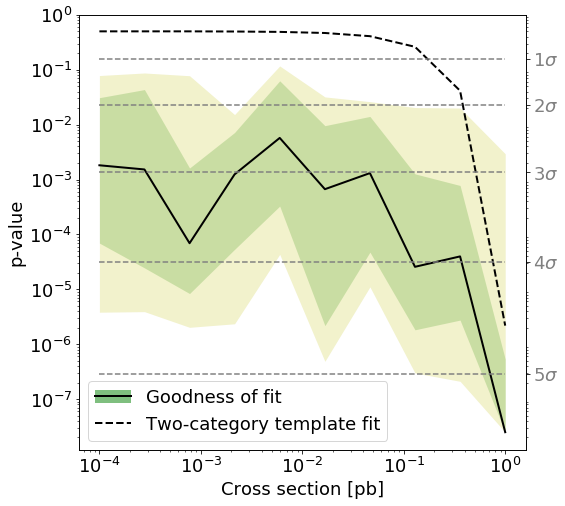

In [109]:
matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.fill_between(sort_xs, sort_pval_band[1, :], sort_pval_band[3, :], color='g', alpha = 0.2, lw=0)
core = ax1.plot(sort_xs, sort_pval_band[2, :], linewidth=2, color='k', label='GOF')
band1 = ax1.fill(np.NaN, np.NaN, 'g', alpha=0.5)
band2 = ax1.fill_between(sort_xs, sort_pval_band[0, :], sort_pval_band[4, :], color='y', alpha = 0.2, lw=0)
core2cat = twocat = ax1.plot(sort_xs, twocatfit, linewidth=2, linestyle='--', color='k', label='Two-category fit')

ax1.set_xlabel('Cross section [pb]')
ax1.set_ylabel('p-value')
ax1.set_ylim(1 - erf(5.7/np.sqrt(2)), 1)

plt.legend([(band1[0], core[0]), core2cat[0]], ['Goodness of fit', 'Two-category template fit'])

ax2 = ax1.twinx()
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim((ax1.get_ylim()))
all_p = []
for i in range(1, 6):
    p = rt.RooStats.SignificanceToPValue(i)
    print(p)
    all_p.append(p)
    ax2.plot([sort_xs[0], sort_xs[-1]], 2*[p], '--', color='grey')
ax2.set_yticks(all_p)
ax2.set_yticklabels(['{}$\sigma$'.format(i) for i in range(1,6)])
ax2.tick_params(axis='y', labelcolor='grey')


In [88]:
rt.RooStats.SignificanceToPValue(5)

2.866515718791945e-07

0.15865525393145707
0.022750131948179216
0.0013498980316300959
3.167124183311998e-05
2.866515718791945e-07


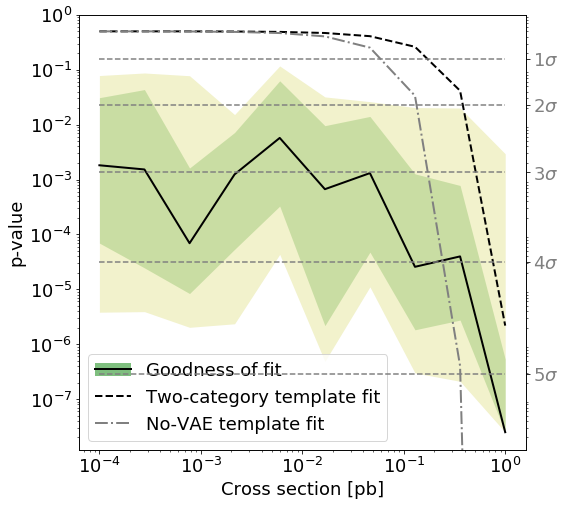

In [110]:
noVAEfit = [0.5,
            0.5,
            0.497287982514,
            0.48858430943,
            0.465678026275,
            0.404912961703,
            0.252594686332,
            0.0335882326653,
            4.02997801979e-07,
            7.64768788081e-38]

matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.fill_between(sort_xs, sort_pval_band[1, :], sort_pval_band[3, :], color='g', alpha = 0.2, lw=0)
core = ax1.plot(sort_xs, sort_pval_band[2, :], linewidth=2, color='k', label='GOF')
band1 = ax1.fill(np.NaN, np.NaN, 'g', alpha=0.5)
band2 = ax1.fill_between(sort_xs, sort_pval_band[0, :], sort_pval_band[4, :], color='y', alpha = 0.2, lw=0)
core2cat = ax1.plot(sort_xs, twocatfit, linewidth=2, linestyle='--', color='k', label='Two-category fit')
coreNoVAE = ax1.plot(sort_xs, noVAEfit, linewidth=2, linestyle='-.', color='grey', label='No-VAE template fit')

ax1.set_xlabel('Cross section [pb]')
ax1.set_ylabel('p-value')
ax1.set_ylim(1 - erf(5.7/np.sqrt(2)), 1)

plt.legend([(band1[0], core[0]), core2cat[0], coreNoVAE[0]], 
           ['Goodness of fit', 'Two-category template fit', 'No-VAE template fit'])

ax2 = ax1.twinx()
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim((ax1.get_ylim()))
all_p = []
for i in range(1, 6):
    p = rt.RooStats.SignificanceToPValue(i)
    print(p)
    all_p.append(p)
    ax2.plot([sort_xs[0], sort_xs[-1]], 2*[p], '--', color='grey')
ax2.set_yticks(all_p)
ax2.set_yticklabels(['{}$\sigma$'.format(i) for i in range(1,6)])
ax2.tick_params(axis='y', labelcolor='grey')

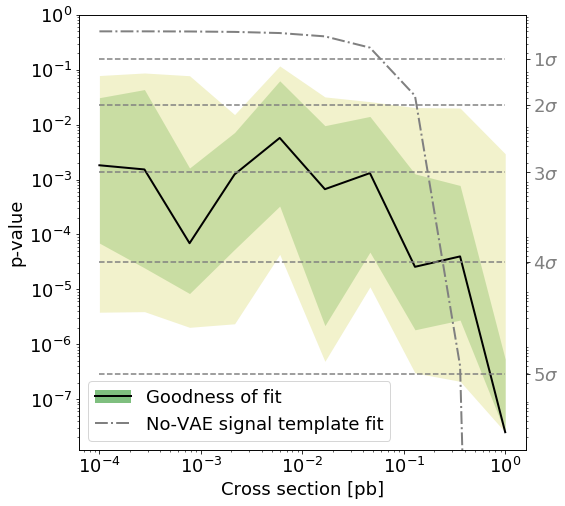

In [111]:
matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(8,8))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.fill_between(sort_xs, sort_pval_band[1, :], sort_pval_band[3, :], color='g', alpha = 0.2, lw=0)
core = ax1.plot(sort_xs, sort_pval_band[2, :], linewidth=2, color='k', label='GOF')
band1 = ax1.fill(np.NaN, np.NaN, 'g', alpha=0.5)
band2 = ax1.fill_between(sort_xs, sort_pval_band[0, :], sort_pval_band[4, :], color='y', alpha = 0.2, lw=0)
#core2cat = ax1.plot(sort_xs, twocatfit, linewidth=2, linestyle='--', color='k', label='Two-category fit')
coreNoVAE = ax1.plot(sort_xs, noVAEfit, linewidth=2, linestyle='-.', color='grey', label='No-VAE template fit')

ax1.set_xlabel('Cross section [pb]')
ax1.set_ylabel('p-value')
ax1.set_ylim(1 - erf(5.7/np.sqrt(2)), 1)


plt.legend([(band1[0], core[0]), coreNoVAE[0]], 
           ['Goodness of fit', 'No-VAE signal template fit'])

ax2 = ax1.twinx()
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim((ax1.get_ylim()))
all_p = []
for i in range(1, 6):
    p = rt.RooStats.SignificanceToPValue(i)
    all_p.append(p)
    ax2.plot([sort_xs[0], sort_xs[-1]], 2*[p], '--', color='grey')
ax2.set_yticks(all_p)
ax2.set_yticklabels(['{}$\sigma$'.format(i) for i in range(1,6)])
ax2.tick_params(axis='y', labelcolor='grey')

## GtoWW3

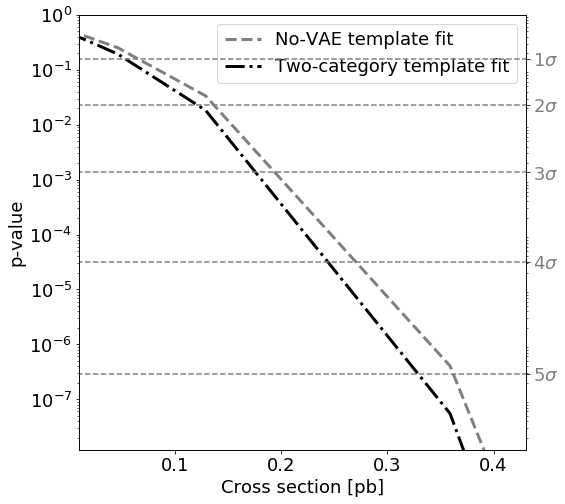

In [137]:
onecat = [0.5,
0.5,
0.497287982514,
0.48858430943,
0.465678026275,
0.404912961703,
0.252594686332,
0.0335882326653,
4.02997801979e-07,
7.64768788081e-38]
twocat = [0.493143667543,
0.487929748801,
0.476502675345,
0.45766656519,
0.42165880563,
0.347129856747,
0.193620125145,
0.0183222997529,
5.49072137128e-08,
1.32604431653e-41]


matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(8,8))
#ax1.set_xscale('log')
ax1.set_yscale('log')
# ax1.fill_between(sort_xs, sort_pval_band[1, :], sort_pval_band[3, :], color='g', alpha = 0.2, lw=0)
# core = ax1.plot(sort_xs, sort_pval_band[2, :], linewidth=2, color='k', label='GOF')
# band1 = ax1.fill(np.NaN, np.NaN, 'g', alpha=0.5)
# band2 = ax1.fill_between(sort_xs, sort_pval_band[0, :], sort_pval_band[4, :], color='y', alpha = 0.2, lw=0)
#core2cat = ax1.plot(sort_xs, twocatfit, linewidth=2, linestyle='--', color='k', label='Two-category fit')
coreonecat = ax1.plot(sort_xs, onecat, linewidth=3, linestyle='--', color='grey', label='No-VAE template fit')
coretwocat = ax1.plot(sort_xs, twocat, linewidth=3, linestyle='-.', color='k', label='Two-category template fit')


ax1.set_xlabel('Cross section [pb]')
ax1.set_ylabel('p-value')
ax1.set_ylim(1 - erf(5.7/np.sqrt(2)), 1)
ax1.set_xlim(0.01, 0.43)
#plt.grid()
plt.legend(loc='best')

ax2 = ax1.twinx()
# ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim((ax1.get_ylim()))
ax2.set_xlim((ax1.get_xlim()))
all_p = []
for i in range(1, 6):
    p = rt.RooStats.SignificanceToPValue(i)
    all_p.append(p)
    ax2.plot([sort_xs[0], sort_xs[-1]], 2*[p], '--', color='grey')
ax2.set_yticks(all_p)
ax2.set_yticklabels(['{}$\sigma$'.format(i) for i in range(1,6)])
ax2.tick_params(axis='y', labelcolor='grey')


# GtoTT Broad

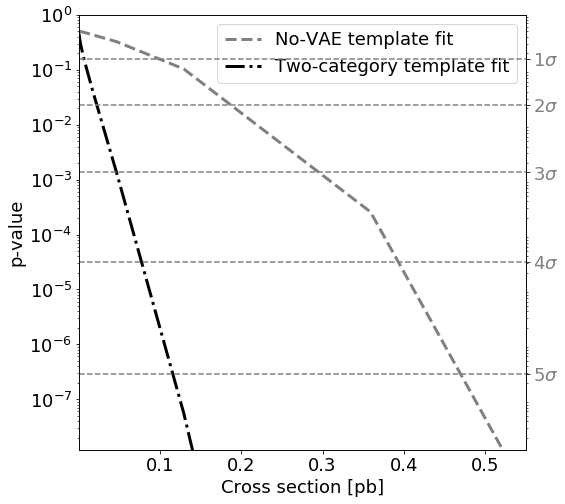

In [136]:
onecat = [0.5,
0.5,
0.5,
0.498101344865,
0.482564997586,
0.435100304152,
0.324692470426,
0.103789356296,
0.000258342513458,
2.30648396805e-21]

twocat = [0.456761576794,
0.424755674853,
0.370419604423,
0.282790713458,
0.159605684428,
0.0420849429376,
0.00131786953781,
5.57125612191e-08,
2.54023085911e-22,
2.25194204921e-76]


matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(8,8))
#ax1.set_xscale('log')
ax1.set_yscale('log')
# ax1.fill_between(sort_xs, sort_pval_band[1, :], sort_pval_band[3, :], color='g', alpha = 0.2, lw=0)
# core = ax1.plot(sort_xs, sort_pval_band[2, :], linewidth=2, color='k', label='GOF')
# band1 = ax1.fill(np.NaN, np.NaN, 'g', alpha=0.5)
# band2 = ax1.fill_between(sort_xs, sort_pval_band[0, :], sort_pval_band[4, :], color='y', alpha = 0.2, lw=0)
#core2cat = ax1.plot(sort_xs, twocatfit, linewidth=2, linestyle='--', color='k', label='Two-category fit')
coreonecat = ax1.plot(sort_xs, onecat, linewidth=3, linestyle='--', color='grey', label='No-VAE template fit')
coretwocat = ax1.plot(sort_xs, twocat, linewidth=3, linestyle='-.', color='k', label='Two-category template fit')


ax1.set_xlabel('Cross section [pb]')
ax1.set_ylabel('p-value')
ax1.set_ylim(1 - erf(5.7/np.sqrt(2)), 1)
ax1.set_xlim(1e-4, 0.55)
#plt.grid()
plt.legend(loc='best')

ax2 = ax1.twinx()
# ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim((ax1.get_ylim()))
ax2.set_xlim((ax1.get_xlim()))
all_p = []
for i in range(1, 6):
    p = rt.RooStats.SignificanceToPValue(i)
    all_p.append(p)
    ax2.plot([sort_xs[0], sort_xs[-1]], 2*[p], '--', color='grey')
ax2.set_yticks(all_p)
ax2.set_yticklabels(['{}$\sigma$'.format(i) for i in range(1,6)])
ax2.tick_params(axis='y', labelcolor='grey')


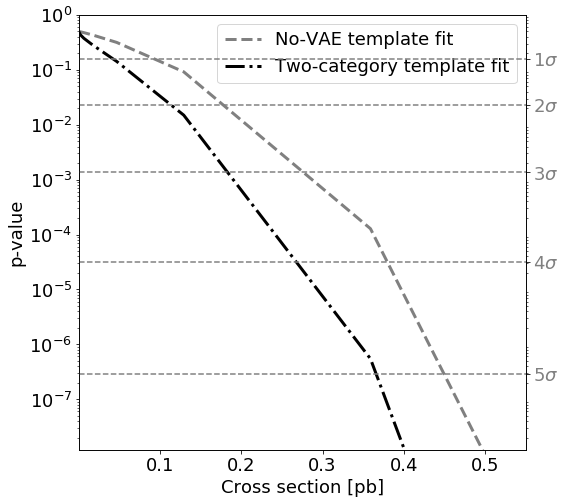

In [138]:
onecat = [0.5,
0.49909235934,
0.497688285019,
0.491191672146,
0.475439571338,
0.43142909423,
0.315653495291,
0.0918639175558,
0.000127713990866,
2.44747070174e-23]

twocat = [0.5,
0.47693636665,
0.45901034328,
0.428195291164,
0.374997882871,
0.283896766858,
0.142283577886,
0.0149369707273,
5.46171025492e-07,
2.32489241011e-32]


matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(8,8))
#ax1.set_xscale('log')
ax1.set_yscale('log')
# ax1.fill_between(sort_xs, sort_pval_band[1, :], sort_pval_band[3, :], color='g', alpha = 0.2, lw=0)
# core = ax1.plot(sort_xs, sort_pval_band[2, :], linewidth=2, color='k', label='GOF')
# band1 = ax1.fill(np.NaN, np.NaN, 'g', alpha=0.5)
# band2 = ax1.fill_between(sort_xs, sort_pval_band[0, :], sort_pval_band[4, :], color='y', alpha = 0.2, lw=0)
#core2cat = ax1.plot(sort_xs, twocatfit, linewidth=2, linestyle='--', color='k', label='Two-category fit')
coreonecat = ax1.plot(sort_xs, onecat, linewidth=3, linestyle='--', color='grey', label='No-VAE template fit')
coretwocat = ax1.plot(sort_xs, twocat, linewidth=3, linestyle='-.', color='k', label='Two-category template fit')


ax1.set_xlabel('Cross section [pb]')
ax1.set_ylabel('p-value')
ax1.set_ylim(1 - erf(5.7/np.sqrt(2)), 1)
ax1.set_xlim(1e-4, 0.55)
#plt.grid()
plt.legend(loc='best')

ax2 = ax1.twinx()
# ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim((ax1.get_ylim()))
ax2.set_xlim((ax1.get_xlim()))
all_p = []
for i in range(1, 6):
    p = rt.RooStats.SignificanceToPValue(i)
    all_p.append(p)
    ax2.plot([sort_xs[0], sort_xs[-1]], 2*[p], '--', color='grey')
ax2.set_yticks(all_p)
ax2.set_yticklabels(['{}$\sigma$'.format(i) for i in range(1,6)])
ax2.tick_params(axis='y', labelcolor='grey')


# Flat cut of loss

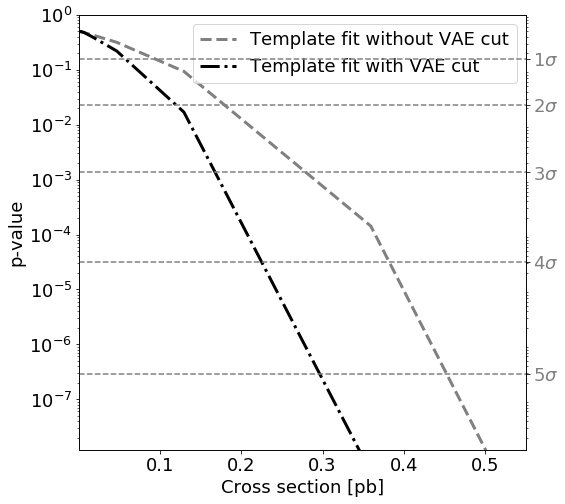

In [160]:
onecat = [0.5,
0.5,
0.5,
0.491393573663,
0.476534837075,
0.432021244121,
0.31704581995,
0.0936432353723,
0.000142662729248,
4.94392305325e-23]

twocat = [0.5,
0.499183521175,
0.5,
0.5,
0.480763050615,
0.395734529365,
0.220373453379,
0.0169877863849,
4.65517543412e-09,
3.31156298442e-51]

sort_xs = np.logspace(-4,0,10)

matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(8,8))
#ax1.set_xscale('log')
ax1.set_yscale('log')
# ax1.fill_between(sort_xs, sort_pval_band[1, :], sort_pval_band[3, :], color='g', alpha = 0.2, lw=0)
# core = ax1.plot(sort_xs, sort_pval_band[2, :], linewidth=2, color='k', label='GOF')
# band1 = ax1.fill(np.NaN, np.NaN, 'g', alpha=0.5)
# band2 = ax1.fill_between(sort_xs, sort_pval_band[0, :], sort_pval_band[4, :], color='y', alpha = 0.2, lw=0)
#core2cat = ax1.plot(sort_xs, twocatfit, linewidth=2, linestyle='--', color='k', label='Two-category fit')
coreonecat = ax1.plot(sort_xs, onecat, linewidth=3, linestyle='--', color='grey', label='Template fit without VAE cut')
coretwocat = ax1.plot(sort_xs, twocat, linewidth=3, linestyle='-.', color='k', label='Template fit with VAE cut')


ax1.set_xlabel('Cross section [pb]')
ax1.set_ylabel('p-value')
ax1.set_ylim(1 - erf(5.7/np.sqrt(2)), 1)
ax1.set_xlim(1e-4, 0.55)
#plt.grid()
plt.legend(loc='best')

ax2 = ax1.twinx()
# ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim((ax1.get_ylim()))
ax2.set_xlim((ax1.get_xlim()))
all_p = []
for i in range(1, 6):
    p = rt.RooStats.SignificanceToPValue(i)
    all_p.append(p)
    ax2.plot([sort_xs[0], sort_xs[-1]], 2*[p], '--', color='grey')
ax2.set_yticks(all_p)
ax2.set_yticklabels(['{}$\sigma$'.format(i) for i in range(1,6)])
ax2.tick_params(axis='y', labelcolor='grey')


# GtoWW1 (1.5TeV) with flat loss cut

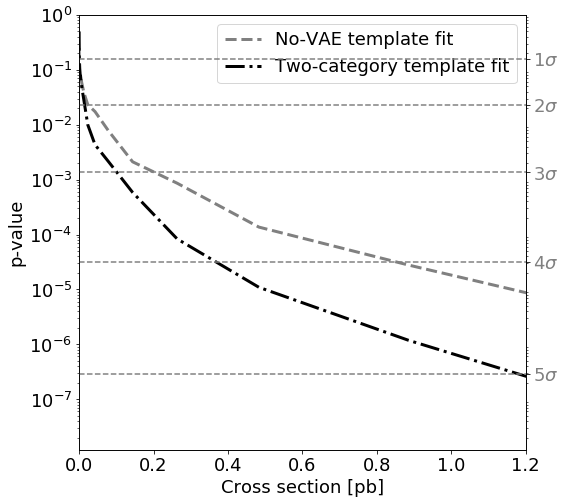

In [158]:
onecat = [0.250985805505,
0.224267492187,
0.196193859612,
0.167205116744,
0.138002747699,
0.109496659739,
0.0826966193537,
0.0587508267721,
0.0386755786208,
0.0231403545291,
0.0173277712717,
0.00782367851133,
0.00211117425625,
0.00085927978285,
0.00013651370655,
2.77606639379e-05,
1.84630234525e-06,
9.06387668983e-08,
2.03444177417e-09,
1.69648507795e-11,]

twocat = [0.5,
0.34404317702,
0.269815495011,
0.129433195478,
0.101321754739,
0.0752841419941,
0.0782909452453,
0.049391902041,
0.0282283606977,
0.00994523546048,
0.00431828823015,
0.00214742128628,
0.00058478557103,
8.31115138352e-05,
1.09311981804e-05,
1.18084589768e-06,
3.48185000949e-08,
6.18461563156e-10,
5.23682549501e-12,
6.42742207759e-15]

sort_xs = np.logspace(-4,1,20)
matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(8,8))
#ax1.set_xscale('log')
ax1.set_yscale('log')
# ax1.fill_between(sort_xs, sort_pval_band[1, :], sort_pval_band[3, :], color='g', alpha = 0.2, lw=0)
# core = ax1.plot(sort_xs, sort_pval_band[2, :], linewidth=2, color='k', label='GOF')
# band1 = ax1.fill(np.NaN, np.NaN, 'g', alpha=0.5)
# band2 = ax1.fill_between(sort_xs, sort_pval_band[0, :], sort_pval_band[4, :], color='y', alpha = 0.2, lw=0)
#core2cat = ax1.plot(sort_xs, twocatfit, linewidth=2, linestyle='--', color='k', label='Two-category fit')
coreonecat = ax1.plot(sort_xs, onecat, linewidth=3, linestyle='--', color='grey', label='No-VAE template fit')
coretwocat = ax1.plot(sort_xs, twocat, linewidth=3, linestyle='-.', color='k', label='Two-category template fit')


ax1.set_xlabel('Cross section [pb]')
ax1.set_ylabel('p-value')
ax1.set_ylim(1 - erf(5.7/np.sqrt(2)), 1)
ax1.set_xlim(0, 1.2)
#plt.grid()
plt.legend(loc='best')

ax2 = ax1.twinx()
#ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim((ax1.get_ylim()))
ax2.set_xlim((ax1.get_xlim()))
all_p = []
for i in range(1, 6):
    p = rt.RooStats.SignificanceToPValue(i)
    all_p.append(p)
    ax2.plot([sort_xs[0], sort_xs[-1]], 2*[p], '--', color='grey')
ax2.set_yticks(all_p)
ax2.set_yticklabels(['{}$\sigma$'.format(i) for i in range(1,6)])
ax2.tick_params(axis='y', labelcolor='grey')


# GtoWW1 (1.5TeV) with QR cut

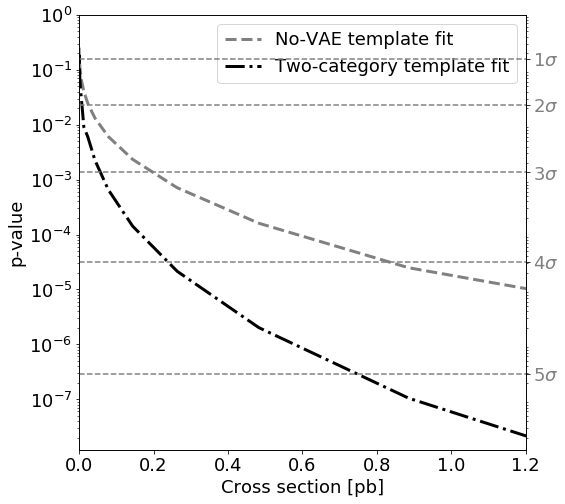

In [157]:
onecat = [0.253475537771,
0.226904512233,
0.198963996779,
0.16999074877,
0.140772607796,
0.112157161027,
0.0851389047324,
0.0608862704237,
0.040410762805,
0.0244189757832,
0.0131229825553,
0.00608381289747,
0.00233981873152,
0.000710952851827,
0.00016034898732,
2.48035320889e-05,
3.20107472741e-06,
1.24820262573e-07,
3.04587132136e-09,
2.82339443275e-11]

twocat = [0.161107822245,
0.135785323702,
0.181646866965,
0.0866988499534,
0.100550361695,
0.0689778050032,
0.0440367357051,
0.0260671024562,
0.00907378882896,
0.00602106432926,
0.00223186558891,
0.00065456896481,
0.00014226503666,
2.1388117668e-05,
2.01083976613e-06,
1.04470317028e-07,
2.57213658481e-09,
1.75955835004e-11,
5.14776383599e-14,
4.67363164833e-17,]

sort_xs = np.logspace(-4,1,20)
matplotlib.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(8,8))
#ax1.set_xscale('log')
ax1.set_yscale('log')
# ax1.fill_between(sort_xs, sort_pval_band[1, :], sort_pval_band[3, :], color='g', alpha = 0.2, lw=0)
# core = ax1.plot(sort_xs, sort_pval_band[2, :], linewidth=2, color='k', label='GOF')
# band1 = ax1.fill(np.NaN, np.NaN, 'g', alpha=0.5)
# band2 = ax1.fill_between(sort_xs, sort_pval_band[0, :], sort_pval_band[4, :], color='y', alpha = 0.2, lw=0)
#core2cat = ax1.plot(sort_xs, twocatfit, linewidth=2, linestyle='--', color='k', label='Two-category fit')
coreonecat = ax1.plot(sort_xs, onecat, linewidth=3, linestyle='--', color='grey', label='No-VAE template fit')
coretwocat = ax1.plot(sort_xs, twocat, linewidth=3, linestyle='-.', color='k', label='Two-category template fit')


ax1.set_xlabel('Cross section [pb]')
ax1.set_ylabel('p-value')
ax1.set_ylim(1 - erf(5.7/np.sqrt(2)), 1)
ax1.set_xlim(0, 1.2)
#plt.grid()
plt.legend(loc='best')

ax2 = ax1.twinx()
#ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_ylim((ax1.get_ylim()))
ax2.set_xlim((ax1.get_xlim()))
all_p = []
for i in range(1, 6):
    p = rt.RooStats.SignificanceToPValue(i)
    all_p.append(p)
    ax2.plot([sort_xs[0], sort_xs[-1]], 2*[p], '--', color='grey')
ax2.set_yticks(all_p)
ax2.set_yticklabels(['{}$\sigma$'.format(i) for i in range(1,6)])
ax2.tick_params(axis='y', labelcolor='grey')
